## Linear Regression

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [5]:
df= pd.read_csv("data/height-weight.csv")

In [6]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0.5, 1.0, 'Weight vs Height')

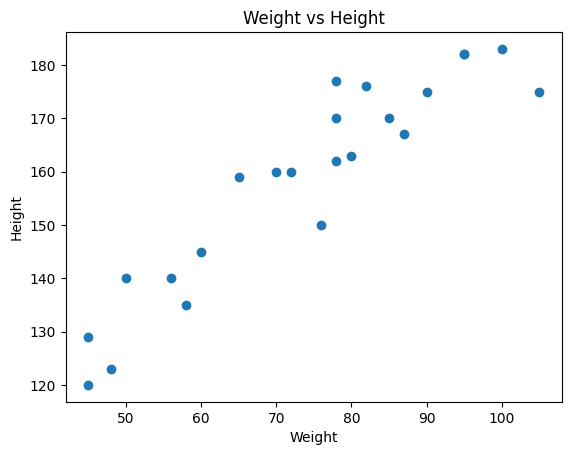

In [8]:
## scatter plot
plt.scatter(df['Weight'] , df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.title('Weight vs Height')

In [9]:
## Correlation
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


In [10]:
## seaborn
import seaborn as sns

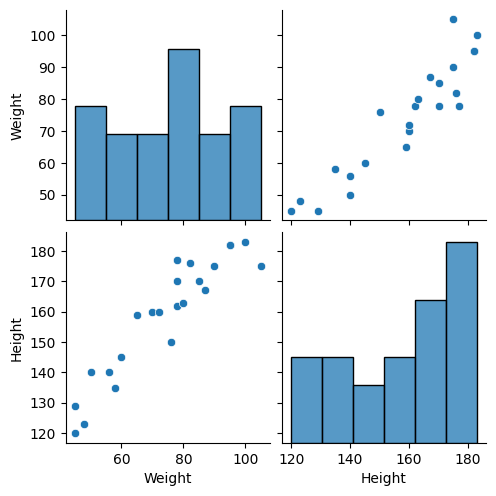

In [11]:
sns.pairplot(df)

In [12]:
## Independent and dependent feature
X = df[['Weight']] ## independent needs to be df or 2d array
y = df['Height'] ## dependent feature needs to be a series or 1d array

In [13]:
## Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state= 21)

In [14]:
X_train.shape

(17, 1)

In [15]:
## Standaridization
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
## Apply Simple Linear Regression
from sklearn.linear_model import LinearRegression

In [18]:
regression = LinearRegression(n_jobs = -1)
regression.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [19]:
regression.coef_

array([19.22929109])

In [20]:
regression.intercept_

np.float64(155.58823529411765)

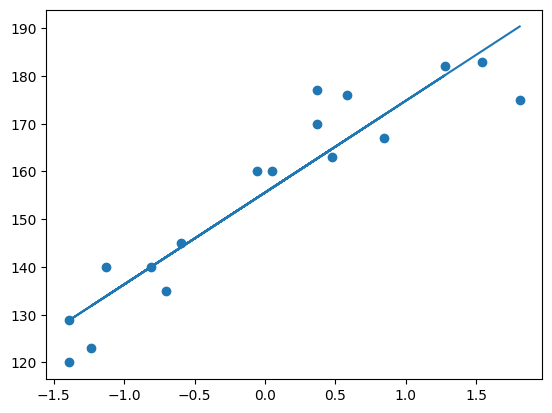

In [21]:
## plot training data best fit line
plt.scatter(X_train, y_train)
plt.plot(X_train, regression.predict(X_train))

In [22]:
## Prediction for test data
y_pred = regression.predict(X_test)

In [23]:
## Performance metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [24]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [25]:
print("mse:" , mse , "mae:" , mae , "rmse:" , rmse)

mse: 35.05178627038776 mae: 3.839769874751932 rmse: 5.9204549040076095


In [26]:
from sklearn.metrics import r2_score

In [27]:
score = r2_score(y_test, y_pred)
print(score)

0.6876573500658516


In [28]:
## OLS Linear Regression

In [30]:
import statsmodels.api as sm

In [31]:
model = sm.OLS(y_train,X_train).fit()

In [32]:
pred = model.predict(X_test)

In [33]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.015
Model:                            OLS   Adj. R-squared (uncentered):             -0.047
Method:                 Least Squares   F-statistic:                             0.2439
Date:                Sat, 01 Mar 2025   Prob (F-statistic):                       0.628
Time:                        18:19:38   Log-Likelihood:                         -109.94
No. Observations:                  17   AIC:                                      221.9
Df Residuals:                      16   BIC:                                      222.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/opt/anaconda3/envs/ds_ml_llm_venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=17 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [34]:
## Prediction of new data
regression.predict([[72]])

array([1540.09719342])

In [35]:
## Prediction of new data
regression.predict(scaler.transform([[72]]))

/opt/anaconda3/envs/ds_ml_llm_venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([156.49380988])